In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [3]:
california_data = fetch_california_housing()

In [4]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

In [7]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [8]:
california_data.target_names

['MedHouseVal']

In [9]:
df['price'] = california_data.target

In [10]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

## Data Exploration & Cleaning

In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

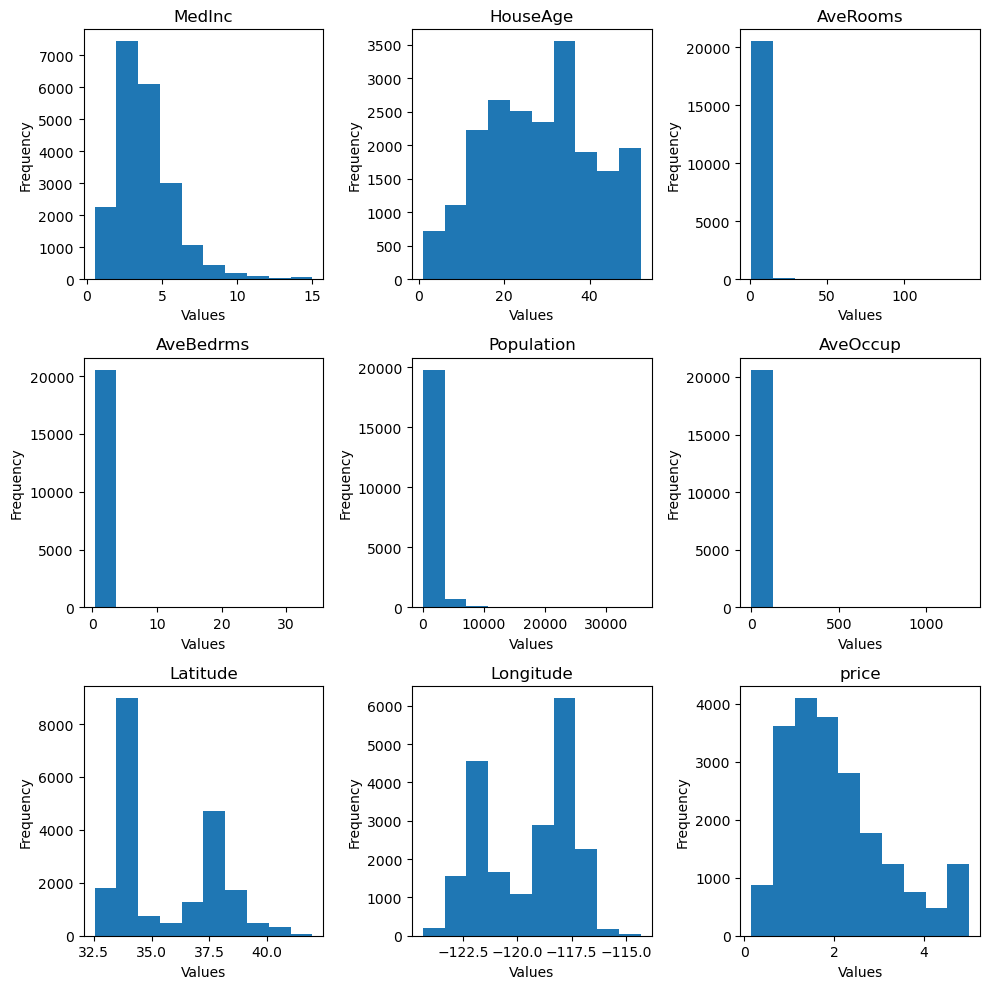

In [12]:
#plotting the distribution of each column

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, column in enumerate(df.columns):
    row = i // 3  
    col = i % 3   
    
    ax[row, col].hist(df[column], bins=10)  
    ax[row, col].set_title(column)
    ax[row, col].set_xlabel('Values')
    ax[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

Looking at the 75% and max values in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup'], it seems that there are a couple of extreme values.
- We'll dig deeper in the relationship between 'AveRooms' and 'AveBedrms' and we'll maybe use IQR or certain threshold to rule out outliers.
- for 'Population', i can't really tell if the high values are outliers or not as this is the median value of an entire block so, we'll probably leave it as it is.
- for 'AveOccup', this the median for the total number of people in one household, as we can see the max number is ridiculous, so this column also needs to be checked.

In [14]:
df[df['AveRooms'] > 141]

MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1914   1.875      33.0  141.909091  25.636364        30.0  2.727273     38.91   

      Longitude    price  
1914     -120.1  5.00001

In [15]:
df[df['AveBedrms'] > 34]

MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1979   4.625      34.0  132.533333  34.066667        36.0       2.4      38.8   

      Longitude  price  
1979    -120.08  1.625

<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

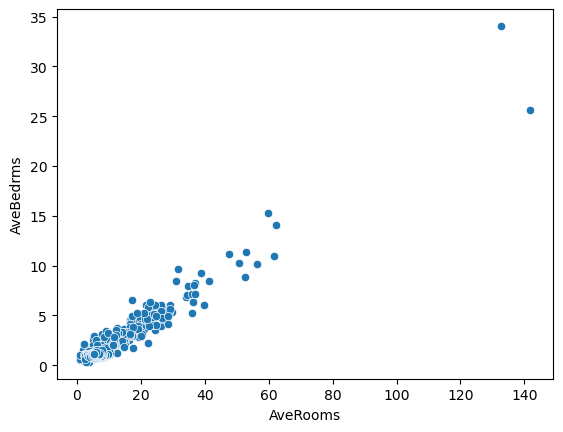

In [16]:
sns.scatterplot(x='AveRooms', y='AveBedrms', data=df)

it seems that the safest approach here is to eliminate the two extreme values, as we're not aware very much of California's Neighborhood.
- Side Note: those two feauters seem to have a correlation so we might consider dropping one of them later to avoid multicollinearity.

In [17]:
#Dropping the two extreme values in 'AveRooms' 
df = df.drop(df[df['AveRooms'] > 132].index)


<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

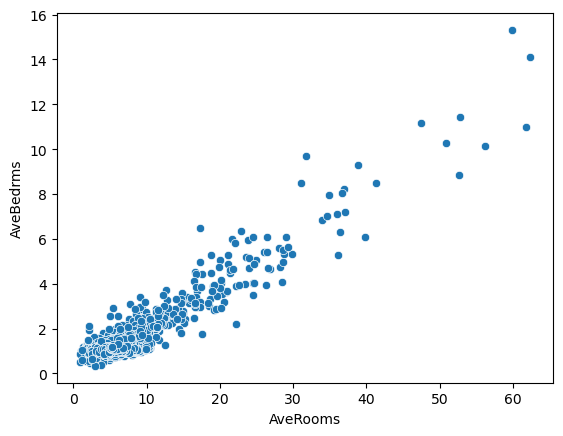

In [18]:
sns.scatterplot(x='AveRooms', y='AveBedrms', data=df)

- Well, That's kinda reasonable!

<Axes: xlabel='Population', ylabel='price'>

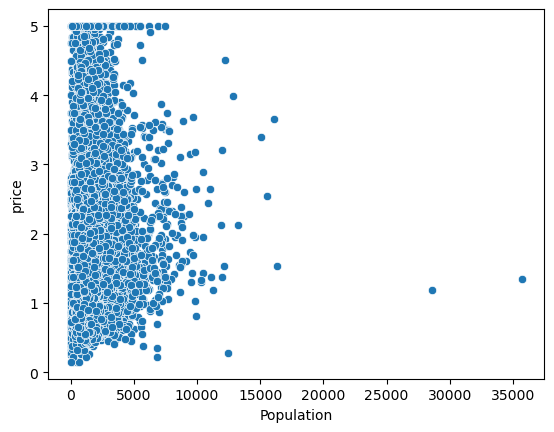

In [19]:
sns.scatterplot(x='Population', y='price', data=df)

Again, we'll eliminate only the two extremes, as some blocks might be overcrowded

In [20]:
df = df.drop(df[df['Population'] > 25000].index)


<Axes: xlabel='Population', ylabel='price'>

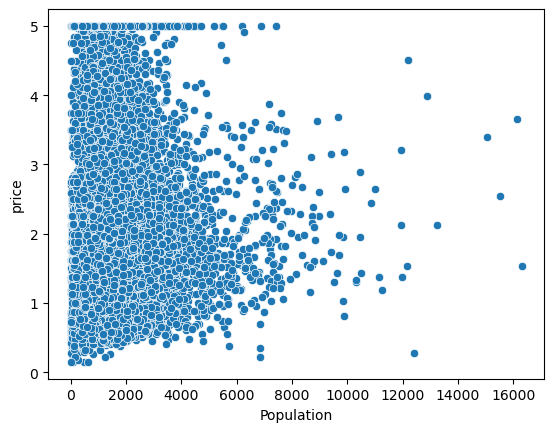

In [21]:
sns.scatterplot(x='Population', y='price', data=df)

<Axes: >

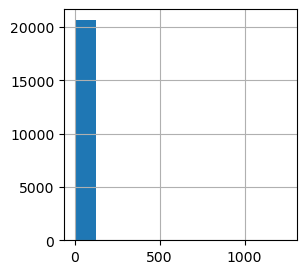

In [22]:
df['AveOccup'].hist(figsize=(3,3))

In [23]:
df['AveOccup'].describe()

count    20636.000000
mean         3.070412
std         10.387003
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282230
max       1243.333333
Name: AveOccup, dtype: float64

In [24]:
df[df['AveOccup'] > 15]

MedInc  HouseAge  AveRooms  AveBedrms  Population     AveOccup  \
1039    4.3029      16.0  6.090592   1.121951      4930.0    17.177700   
3364    5.5179      36.0  5.142857   1.142857      4198.0   599.714286   
4479    3.5769      41.0  4.940000   1.100000       925.0    18.500000   
5986    1.8750      52.0  4.500000   1.206349      2688.0    21.333333   
7164    2.1845      36.0  4.812155   1.110497      2862.0    15.812155   
8874    9.3370      52.0  7.285714   1.214286      1154.0    41.214286   
9172    4.2391       5.0  5.123810   0.933333      8733.0    83.171429   
12104   1.6250       8.0  7.600000   0.950000      1275.0    63.750000   
13034   6.1359      52.0  8.275862   1.517241      6675.0   230.172414   
13366   4.2578      36.0  5.258824   1.117647      2886.0    33.952941   
14756   2.5625      23.0  4.589091   1.069091      5176.0    18.821818   
15790   4.3958      52.0  2.117647   0.926471      1061.0    15.602941   
16420   5.7485      26.0  5.366667   0.900000      1542.0    51.400000   
16669   4.2639      46.0  9.076923   1.307692      6532.0   502.461538   
16672   1.6563      16.0  5.125000   0.937500       542.0    16.937500   
19006  10.2264      45.0  3.166667   0.833333      7460.0  1243.333333   
19435   0.5360      16.0  2.111111   2.111111       166.0    18.444444   
19524   0.9573      19.0  2.951220   1.000000       658.0    16.048780   
20352   4.0208       8.0  2.500000   0.625000       309.0    19.312500   

       Latitude  Longitude    price  
1039      38.42    -120.97  1.21900  
3364      40.41    -120.51  0.67500  
4479      34.07    -118.16  1.35700  
5986      34.10    -117.71  2.12500  
7164      34.06    -118.17  1.23800  
8874      34.06    -118.45  5.00001  
9172      34.47    -118.59  1.54600  
12104     33.97    -117.33  1.62500  
13034     38.69    -121.15  2.25000  
13366     33.94    -117.63  1.83300  
14756     32.56    -116.97  1.53300  
15790     37.77    -122.40  2.25000  
16420     37.89    -121.29  1.62500  
16669     35.32    -120.70  3.50000  
16672     35.34    -120.69  0.42500  
19006     38.32    -121.98  1.37500  
19435     37.67    -121.04  1.62500  
19524     37.64    -121.00  1.62500  
20352     34.22    -119.09  0.52500

<Axes: xlabel='AveOccup', ylabel='price'>

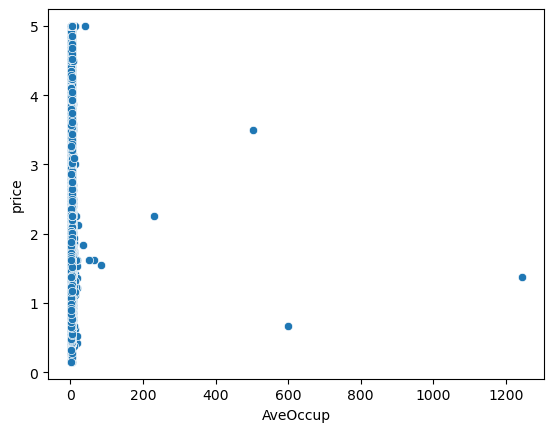

In [25]:
sns.scatterplot(x='AveOccup', y='price', data=df)

In [26]:
def compute_iqr(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    return Q1, Q3,IQR

In [27]:
Q1, Q3, IQR = compute_iqr(df['AveOccup'])

In [28]:
df[(df['AveOccup'] < Q1 - 1.5*IQR) | (df['AveOccup'] > Q3 + 1.5*IQR)]

MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
89     1.2434      52.0  2.929412   0.917647       396.0   4.658824     37.80   
91     0.8668      52.0  2.443182   0.988636       904.0  10.272727     37.80   
92     0.7500      52.0  2.823529   0.911765       191.0   5.617647     37.80   
200    3.0257      52.0  4.046948   1.009390       994.0   4.666667     37.78   
270    3.8750      33.0  3.021277   0.659574       575.0  12.234043     37.78   
...       ...       ...       ...        ...         ...        ...       ...   
20353  5.0066      12.0  3.800000   1.466667        69.0   4.600000     34.13   
20393  5.7560      16.0  6.117493   1.026110      2007.0   5.240209     34.22   
20513  2.6250      34.0  5.597403   1.103896       391.0   5.077922     38.67   
20527  1.4653       7.0  3.525794   1.017857      4479.0   8.886905     38.54   
20601  1.5694      30.0  5.022727   1.170455       413.0   4.693182     39.13   

       Longitude    price  
89       -122.27  5.00001  
91       -122.28  1.37500  
92       -122.28  1.62500  
200      -122.23  0.80800  
270      -122.18  2.25000  
...          ...      ...  
20353    -119.05  2.75000  
20393    -118.88  3.02700  
20513    -121.63  2.25000  
20527    -121.79  3.10000  
20601    -121.57  0.57900  

[709 rows x 9 columns]

obviosly, we can use IQR to eliminate outliers, but then we'll be eliminating plausible values, for example the first value in the table above in 'AveOccup' is almost 5. that's a very reasonable number to be in single household. so, instead we'll use our intuition and drop values above 15. Again, for some unprivileged families that might be common.

In [29]:
df = df.drop(df[df['AveOccup'] > 15].index)


<Axes: xlabel='AveOccup', ylabel='price'>

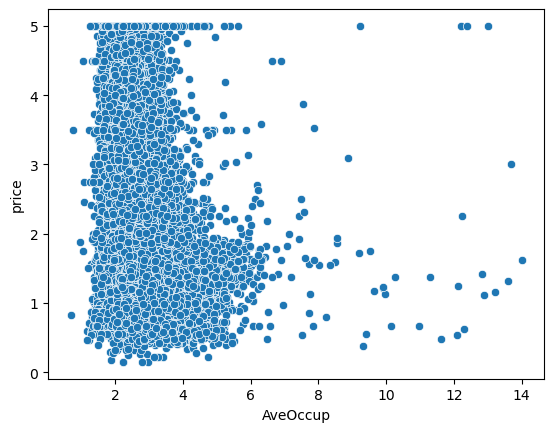

In [30]:
sns.scatterplot(x='AveOccup', y='price', data=df)

In [31]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20617.000000  20617.000000  20617.000000  20617.000000  20617.000000   
mean       3.870682     28.638599      5.416571      1.093878   1421.048358   
std        1.899229     12.581666      2.106526      0.377906   1087.163106   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564300     18.000000      4.440620      1.006116    787.000000   
50%        3.534700     29.000000      5.229167      1.048780   1166.000000   
75%        4.743700     37.000000      6.052133      1.099448   1724.000000   
max       15.000100     52.000000     62.422222     15.312500  16305.000000   

           AveOccup      Latitude     Longitude         price  
count  20617.000000  20617.000000  20617.000000  20617.000000  
mean       2.926413     35.631324   -119.569553      2.068804  
std        0.813245      2.135777      2.003870      1.153935  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429194     33.930000   -121.800000      1.196000  
50%        2.817647     34.260000   -118.490000      1.798000  
75%        3.280212     37.710000   -118.010000      2.649000  
max       14.000000     41.950000   -114.310000      5.000010

## EDA

In [32]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.120109  0.386399  -0.076084    0.005657 -0.061007   
HouseAge   -0.120109  1.000000 -0.182834  -0.100738   -0.306150 -0.003442   
AveRooms    0.386399 -0.182834  1.000000   0.790323   -0.081054 -0.054541   
AveBedrms  -0.076084 -0.100738  0.790323   1.000000   -0.076716 -0.076585   
Population  0.005657 -0.306150 -0.081054  -0.076716    1.000000  0.174140   
AveOccup   -0.061007 -0.003442 -0.054541  -0.076585    0.174140  1.000000   
Latitude   -0.080260  0.010916  0.116076   0.076253   -0.112742 -0.151062   
Longitude  -0.014928 -0.108179 -0.030957   0.018738    0.103902  0.157364   
price       0.688751  0.105106  0.171408  -0.065194   -0.023437 -0.250442   

            Latitude  Longitude     price  
MedInc     -0.080260  -0.014928  0.688751  
HouseAge    0.010916  -0.108179  0.105106  
AveRooms    0.116076  -0.030957  0.171408  
AveBedrms   0.076253   0.018738 -0.065194  
Population -0.112742   0.103902 -0.023437  
AveOccup   -0.151062   0.157364 -0.250442  
Latitude    1.000000  -0.924809 -0.144327  
Longitude  -0.924809   1.000000 -0.046050  
price      -0.144327  -0.046050  1.000000

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


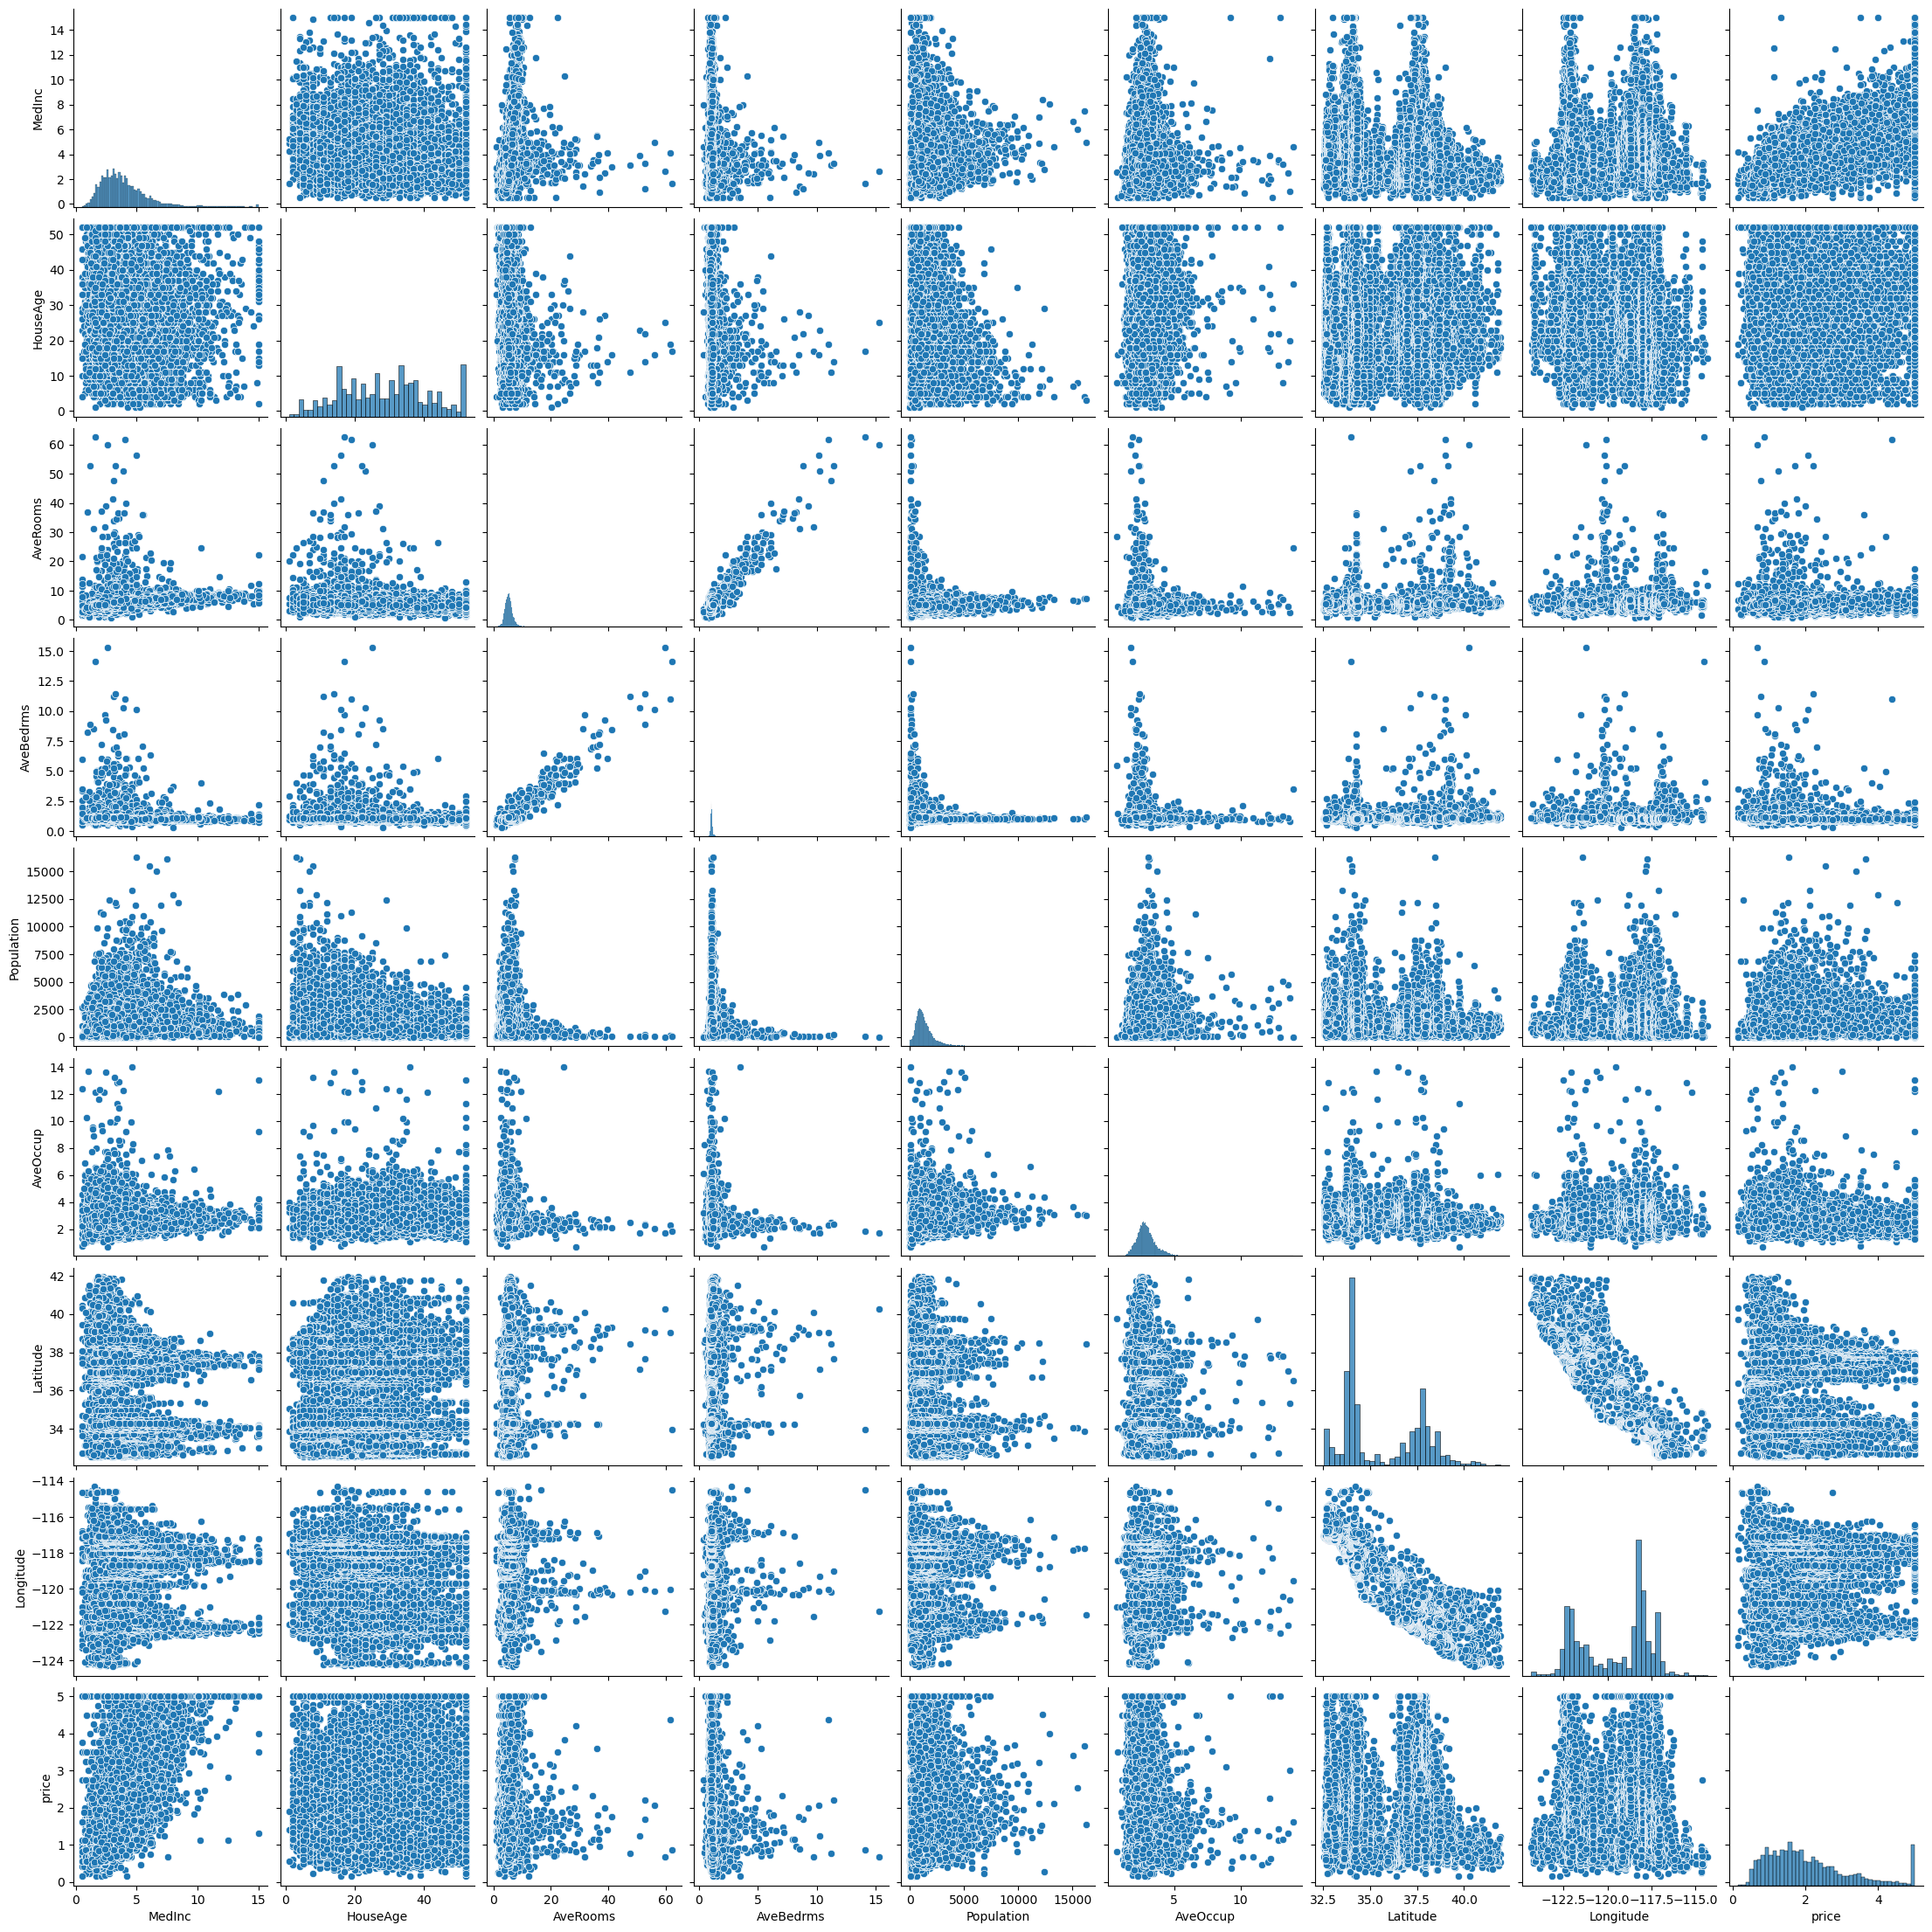

In [34]:
import seaborn as sns
sns.pairplot(df)


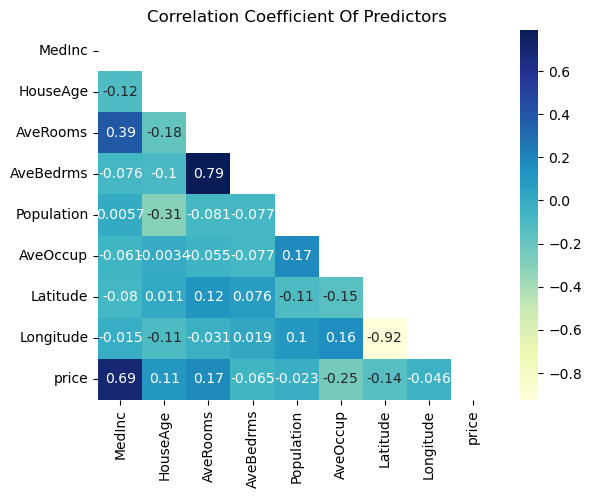

In [35]:
# creating a heatmap of correlations

mask = np.triu(np.ones_like(df.corr())) # creating a mask to show the lower triangle of the heatmap only
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.title('Correlation Coefficient Of Predictors')
plt.show()

#### Checking for Multicollinearity
- From the heatmap we can see that there's a correlation between 'AveRooms' and 'AveBedrms', 'Latitude' and 'Longitude'.! it's not good practice to eliminate one of the features right away because we don't wanna run into the risk of losing too much info.

In [36]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data = df[['AveRooms','AveBedrms', 'Latitude', 'Longitude']] #creating df with the features to check
vif_data = add_constant(vif_data)

In [37]:
vif_data.head()

const  AveRooms  AveBedrms  Latitude  Longitude
0    1.0  6.984127   1.023810     37.88    -122.23
1    1.0  6.238137   0.971880     37.86    -122.22
2    1.0  8.288136   1.073446     37.85    -122.24
3    1.0  5.817352   1.073059     37.85    -122.25
4    1.0  6.281853   1.081081     37.85    -122.25

In [38]:
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

In [39]:
vif

Variable           VIF
0      const  14698.468135
1   AveRooms      2.688373
2  AveBedrms      2.708605
3   Latitude      7.380843
4  Longitude      7.320096

A rule of thumb for interpreting the variance inflation factor:
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

So, we probably need to investigate more in Lat & Long relationship, we might drop one of them.

<Axes: xlabel='Longitude', ylabel='Latitude'>

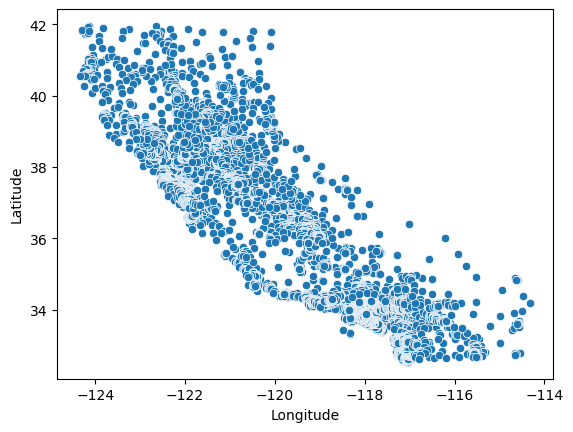

In [40]:
sns.scatterplot(x=df['Longitude'],y=df['Latitude'])

<Axes: xlabel='Longitude', ylabel='price'>

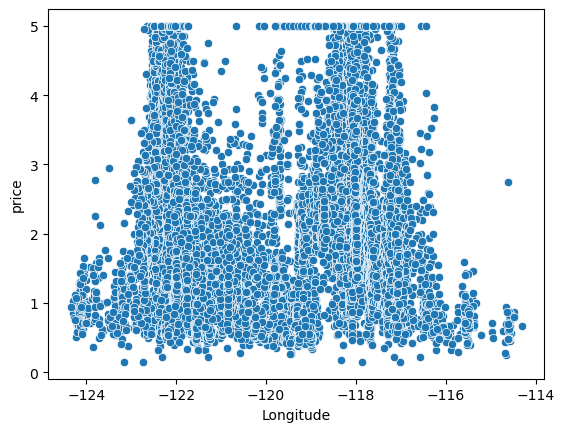

In [41]:
sns.scatterplot(x=df['Longitude'],y=df['price'])

<Axes: xlabel='Latitude', ylabel='price'>

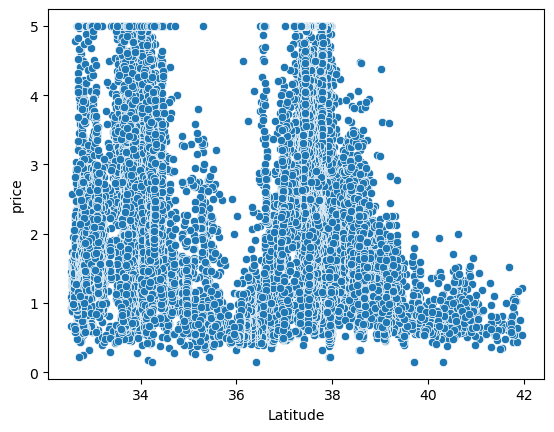

In [42]:
sns.scatterplot(x=df['Latitude'],y=df['price'])

Looking at the graphs and the data, both features seem to capture the same relation with the dependant feature. Based on this good [article](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/), There are multiple ways to deal with multicollinearity; one of which is to simply combine the independant features, such as adding them together. we'll take this approach.

In [43]:
df['lon_lat'] = df['Latitude'] + df['Longitude']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  lon_lat  
0    -122.23  4.526   -84.35  
1    -122.22  3.585   -84.36  
2    -122.24  3.521   -84.39  
3    -122.25  3.413   -84.40  
4    -122.25  3.422   -84.40

<Axes: xlabel='lon_lat', ylabel='price'>

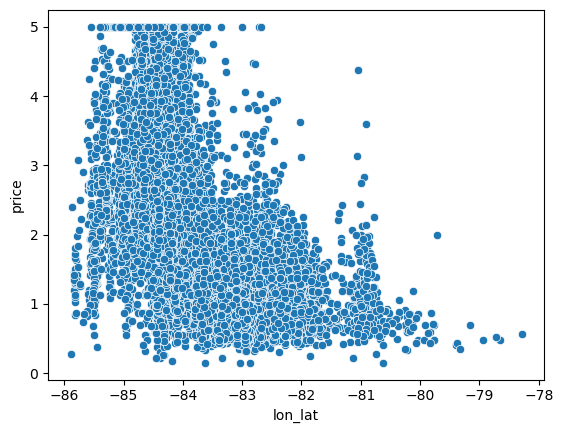

In [44]:
sns.scatterplot(x=df['lon_lat'],y=df['price'])

It doesn't look as if adding them captures the same relation with the dependant variable, so we'll probably leave the both features for now..

In [45]:
df = df.drop('lon_lat',axis=1)

## Splitting & Training

In [46]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [47]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)


In [51]:
X_test = scaler.transform(X_test)


In [52]:
X_train

array([[-1.17861319,  0.75117053,  0.4394937 , ..., -1.25838529,
         2.0426927 , -0.82249309],
       [ 0.76523622, -0.28104245,  0.05816788, ..., -0.23355746,
         0.77040998, -1.1920024 ],
       [-0.40330882, -0.04283945, -0.27235396, ..., -0.47472178,
         1.15864331, -1.3368101 ],
       ...,
       [-0.85065026, -0.28104245, -0.62440486, ...,  0.55379891,
        -0.74978077,  0.60561043],
       [ 0.96978014, -1.07505243,  0.48417223, ...,  0.3131667 ,
         0.90605777, -1.18700903],
       [ 0.20245183,  1.8627845 , -0.25091399, ..., -1.27630732,
         0.99025295, -1.42169737]])

In [53]:
X_test

array([[-8.21474673e-01,  5.92368531e-01, -6.89969043e-02, ...,
         3.73782056e-02,  1.16799833e+00, -1.32182999e+00],
       [-4.67432130e-01,  1.30697752e+00, -3.73926771e-01, ...,
         2.06657593e-01, -8.29298442e-01,  7.05477811e-01],
       [-1.18191905e+00,  7.51170528e-01, -1.03456409e+00, ...,
        -1.13517376e+00, -7.63813302e-01,  6.20590539e-01],
       ...,
       [-5.10618289e-01,  1.14817552e+00, -1.90754647e-01, ...,
         3.09133404e-01,  9.94930462e-01, -1.30684988e+00],
       [-7.44705110e-01, -5.19245444e-01,  6.75940993e-01, ...,
        -3.40745245e-01,  2.65076901e+00, -7.97526248e-01],
       [-8.91002814e-01,  3.65615434e-02, -1.58205782e-01, ...,
         6.85596313e-04,  3.02658980e-01,  2.31107759e-01]])

In [54]:
# Training the model

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()


In [56]:
reg_model.fit(X_train,y_train)


LinearRegression()

In [57]:
## print the coefficients and the intercept
print(reg_model.coef_)

[ 0.78905261  0.13574355 -0.16194581  0.20202518  0.0431129  -0.24445573
 -0.92739888 -0.84841967]


In [58]:
print(reg_model.intercept_)


2.069960063751648


In [59]:
# Testing the model
reg_pred = reg_model.predict(X_test)


In [60]:
reg_pred

array([ 1.44798765,  2.05531909,  1.83928162, ...,  1.93691122,
       -0.25720961,  0.85058171])

<Axes: xlabel='price'>

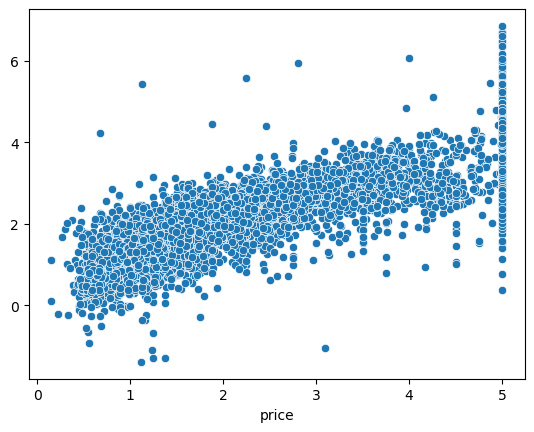

In [61]:
## plot a scatter plot for the prediction
sns.scatterplot(x=y_test,y=reg_pred)

As we can tell from the graph that the relation between the predicted and observed values are roughly linear except it seems as if there is some kind of threeshold at value 5.. we'll try to understand this more

In [62]:
df['price'].describe()

count    20617.000000
mean         2.068804
std          1.153935
min          0.149990
25%          1.196000
50%          1.798000
75%          2.649000
max          5.000010
Name: price, dtype: float64

In [63]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20617.000000  20617.000000  20617.000000  20617.000000  20617.000000   
mean       3.870682     28.638599      5.416571      1.093878   1421.048358   
std        1.899229     12.581666      2.106526      0.377906   1087.163106   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564300     18.000000      4.440620      1.006116    787.000000   
50%        3.534700     29.000000      5.229167      1.048780   1166.000000   
75%        4.743700     37.000000      6.052133      1.099448   1724.000000   
max       15.000100     52.000000     62.422222     15.312500  16305.000000   

           AveOccup      Latitude     Longitude         price  
count  20617.000000  20617.000000  20617.000000  20617.000000  
mean       2.926413     35.631324   -119.569553      2.068804  
std        0.813245      2.135777      2.003870      1.153935  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429194     33.930000   -121.800000      1.196000  
50%        2.817647     34.260000   -118.490000      1.798000  
75%        3.280212     37.710000   -118.010000      2.649000  
max       14.000000     41.950000   -114.310000      5.000010

In [64]:
df[df['price']>5]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
89      1.2434      52.0  2.929412   0.917647       396.0  4.658824     37.80   
459     1.1696      52.0  2.436000   0.944000      1349.0  5.396000     37.87   
493     7.8521      52.0  7.794393   1.051402       517.0  2.415888     37.86   
494     9.3959      52.0  7.512097   0.955645      1366.0  2.754032     37.85   
509     7.8772      52.0  8.282548   1.049861       947.0  2.623269     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20443   3.3438      50.0  5.342857   0.942857       130.0  3.714286     34.27   

       Longitude    price  
89       -122.27  5.00001  
459      -122.25  5.00001  
493      -122.24  5.00001  
494      -122.24  5.00001  
509      -122.23  5.00001  
...          ...      ...  
20422    -118.90  5.00001  
20426    -118.69  5.00001  
20427    -118.80  5.00001  
20436    -118.69  5.00001  
20443    -118.85  5.00001  

[963 rows x 9 columns]

In [65]:
Q1, Q2, IQR = compute_iqr(df['price'])

In [66]:
(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

(-0.9835, 5.461729614906078)

In [67]:
df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, price]
Index: []

Well, those values don't even seem to be outliers, so i guess that's just the data..

In [68]:
residuals=y_test-reg_pred
residuals


18916   -0.543988
7981    -0.396319
5053     0.827718
11522   -0.334055
4919     0.130580
           ...   
14061   -0.902209
14238   -0.243096
263     -0.722911
9660     0.832210
19887   -0.188582
Name: price, Length: 6186, dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


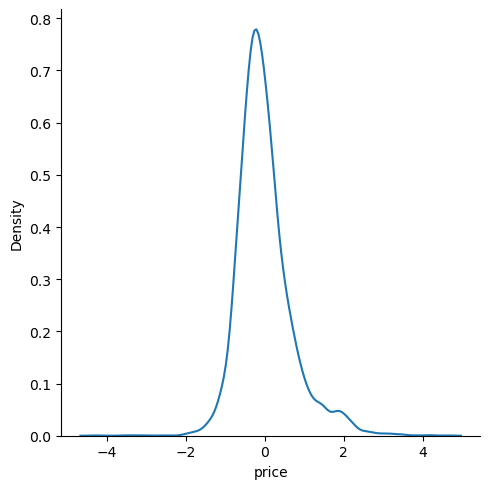

In [91]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

The distribution of the residuals is Normally Distributed, although it looks like it has long tails...

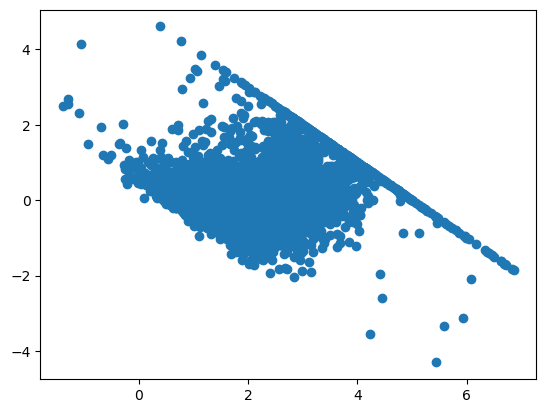

In [70]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

Roughly, most of the points centered around 0, again that abnormal line -kind of threeshold- appears..

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [72]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5020460030516436
0.48158653435789345
0.6939643610142335


In [73]:
df['price'].mean()

2.0688040253189115

In [74]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6435851875473286


In [75]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6431235850704593

In [76]:
from sklearn.model_selection import cross_val_score


In [77]:
cv_result = cross_val_score(reg_model, X, y, scoring='r2', cv=5)

In [78]:
cv_result

array([0.58169373, 0.54697554, 0.60998451, 0.56942524, 0.68280779])

In [79]:
r2_cv_score = np.mean(cv_result)

In [80]:
r2_cv_score

0.5981773609311698

In [81]:
1 - (1-r2_cv_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.5976569495482087

### Testing different model

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [83]:
parameters = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeRegressor()


In [84]:
reg_grid = GridSearchCV(dt_model, param_grid=parameters, scoring='r2', cv=10, verbose=3)
reg_grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.632 total time=   0.2s
[CV 2/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.650 total time=   0.2s
[CV 3/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.630 total time=   0.2s
[CV 4/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.626 total time=   0.2s
[CV 5/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.648 total time=   0.2s
[CV 6/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.618 total time=   0.2s
[CV 7/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.577 total time=   0.2s
[CV 8/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.624 total time=   0.2s
[CV 9/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.579 total time=   0.2s
[CV 10/10]

[CV 1/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.693 total time=   0.1s
[CV 2/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.718 total time=   0.1s
[CV 3/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.683 total time=   0.1s
[CV 4/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.722 total time=   0.1s
[CV 5/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.708 total time=   0.1s
[CV 6/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.669 total time=   0.1s
[CV 7/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.670 total time=   0.1s
[CV 8/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.666 total time=   0.1s
[CV 9/10] END max_depth=None, min_samples_leaf=4, min_samples_split=10;, score=0.676 total time=   0.1s
[CV 10/10] END max_depth=None, min_samples_leaf=4, min_samples_s

[CV 3/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.627 total time=   0.0s
[CV 4/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.623 total time=   0.0s
[CV 5/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.634 total time=   0.0s
[CV 6/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.608 total time=   0.0s
[CV 7/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.613 total time=   0.0s
[CV 8/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.576 total time=   0.0s
[CV 9/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.606 total time=   0.0s
[CV 10/10] END max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.615 total time=   0.0s
[CV 1/10] END max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.590 total time=   0.0s
[CV 2/10] END max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.630 total time=   0.

[CV 4/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.715 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.726 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.695 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.691 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.685 total time=   0.0s
[CV 9/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.696 total time=   0.0s
[CV 10/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2;, score=0.681 total time=   0.0s
[CV 1/10] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.689 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.731 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.721 total ti

[CV 5/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.687 total time=   0.1s
[CV 6/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.688 total time=   0.1s
[CV 7/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.665 total time=   0.1s
[CV 8/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.668 total time=   0.1s
[CV 9/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.667 total time=   0.1s
[CV 10/10] END max_depth=15, min_samples_leaf=2, min_samples_split=10;, score=0.679 total time=   0.1s
[CV 1/10] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.689 total time=   0.1s
[CV 2/10] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.714 total time=   0.1s
[CV 3/10] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.687 total time=   0.1s
[CV 4/10] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.725 to

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=3)

In [85]:
reg_grid.best_score_, reg_grid.best_params_

(0.7050429105466602,
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10})

In [86]:
best_model = reg_grid.best_estimator_

y_gs_pred = best_model.predict(X_test)

In [87]:
print(mean_absolute_error(y_test,y_gs_pred))
print(mean_squared_error(y_test,y_gs_pred))
print(np.sqrt(mean_squared_error(y_test,y_gs_pred)))

0.4211519948729833
0.3856106904280046
0.620975595678288


In [88]:
grid_r2 = r2_score(y_test,y_gs_pred)
grid_r2

0.7146154385485681

In [89]:
1 - (1-grid_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.7142458292735785